In [1]:
import matplotlib.pyplot as plt
from coffea.util import load
import hist
import mplhep as hep
from pocket_coffea.utils.plot_utils import stack_sum

In [2]:
filename = "/work/mmarcheg/BTVNanoCommissioning/output/pocket_coffea/ggH_proxy/ggH_proxy_2018UL_VJets/output_all.coffea"
o = load(filename)
o.keys()

dict_keys(['sum_genweights', 'sumw', 'cutflow', 'variables', 'columns', 'processing_metadata', 'seed_fatjet_chunk'])

In [3]:
o['variables'].keys()

dict_keys(['MuonGood_eta_1', 'MuonGood_pt_1', 'MuonGood_phi_1', 'MuonGood_eta_2', 'MuonGood_pt_2', 'MuonGood_phi_2', 'FatJetGood_eta', 'FatJetGood_pt', 'FatJetGood_phi', 'FatJetGood_mass', 'FatJetGood_msoftdrop', 'FatJetGood_tau21', 'FatJetGood_btagDDBvLV2', 'FatJetGood_btagDDCvLV2', 'FatJetGood_btagDDCvBV2', 'FatJetGood_particleNetMD_Xbb_QCD', 'FatJetGood_particleNetMD_Xcc_QCD', 'FatJetGood_deepTagMD_ZHbbvsQCD', 'FatJetGood_deepTagMD_ZHccvsQCD', 'FatJetGood_btagHbb', 'FatJetGood_eta_1', 'FatJetGood_pt_1', 'FatJetGood_phi_1', 'FatJetGood_mass_1', 'FatJetGood_msoftdrop_1', 'FatJetGood_tau21_1', 'FatJetGood_btagDDBvLV2_1', 'FatJetGood_btagDDCvLV2_1', 'FatJetGood_btagDDCvBV2_1', 'FatJetGood_particleNetMD_Xbb_QCD_1', 'FatJetGood_particleNetMD_Xcc_QCD_1', 'FatJetGood_deepTagMD_ZHbbvsQCD_1', 'FatJetGood_deepTagMD_ZHccvsQCD_1', 'FatJetGood_btagHbb_1', 'FatJetGood_eta_2', 'FatJetGood_pt_2', 'FatJetGood_phi_2', 'FatJetGood_mass_2', 'FatJetGood_msoftdrop_2', 'FatJetGood_tau21_2', 'FatJetGood_bta

In [22]:
from copy import deepcopy

def group_flavor(h_dict):
    h_flavor = {f : None for f in ['l', 'c', 'b']}
    for s, h in h_dict.items():
        for f in h_flavor.keys():
            if s.endswith(f"{f}"):
                if h_flavor[f] == None:
                    h_flavor[f] = deepcopy(h)
                else:
                    h_flavor[f] += h
    return h_flavor

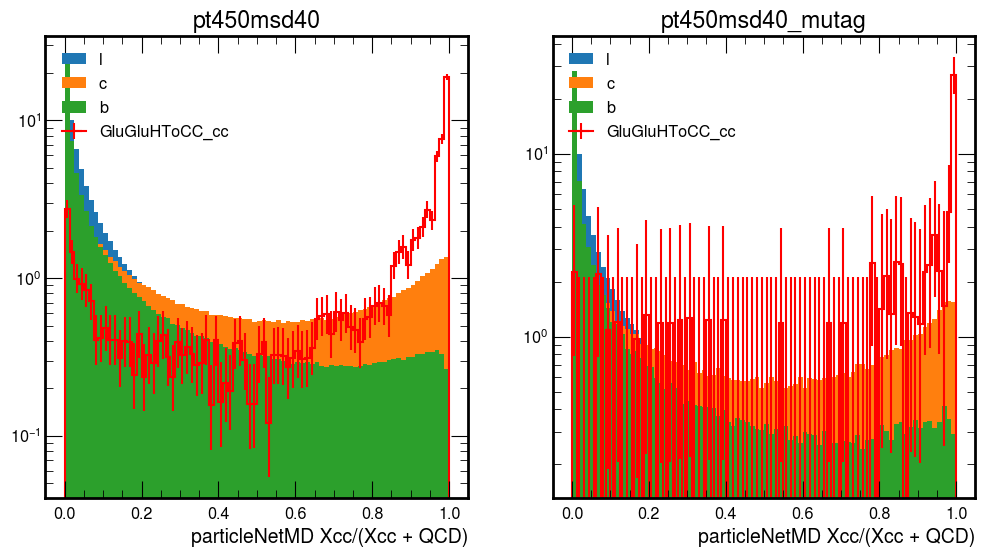

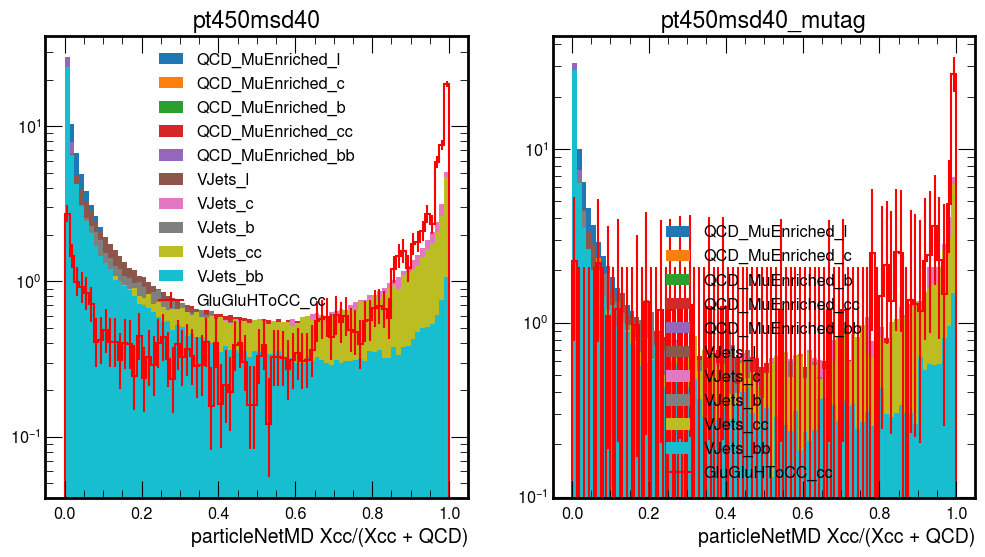

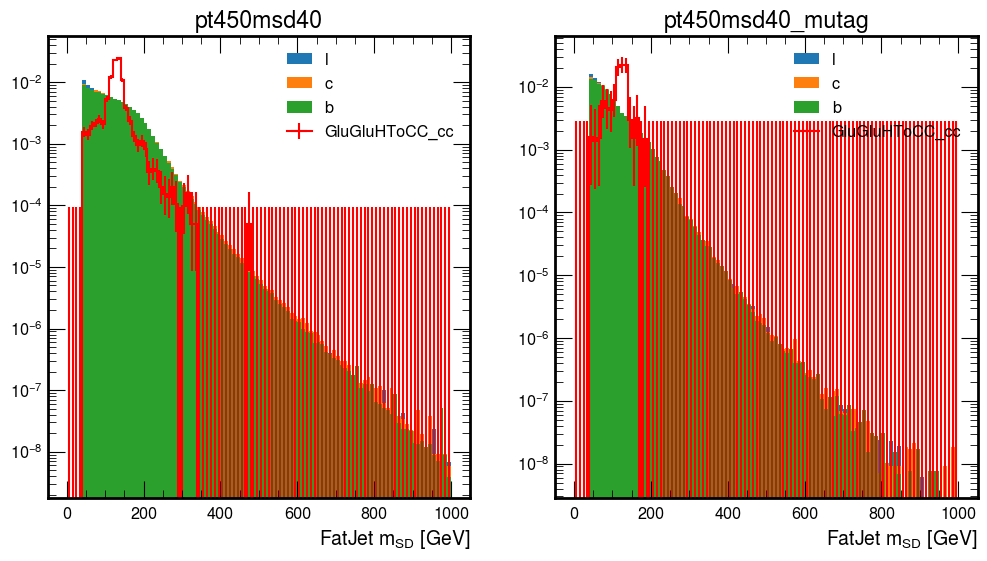

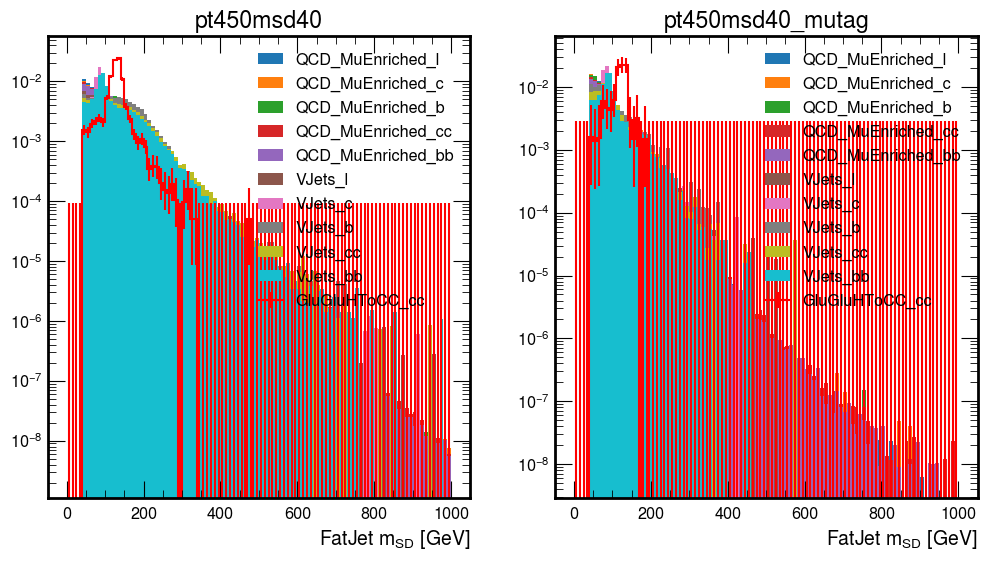

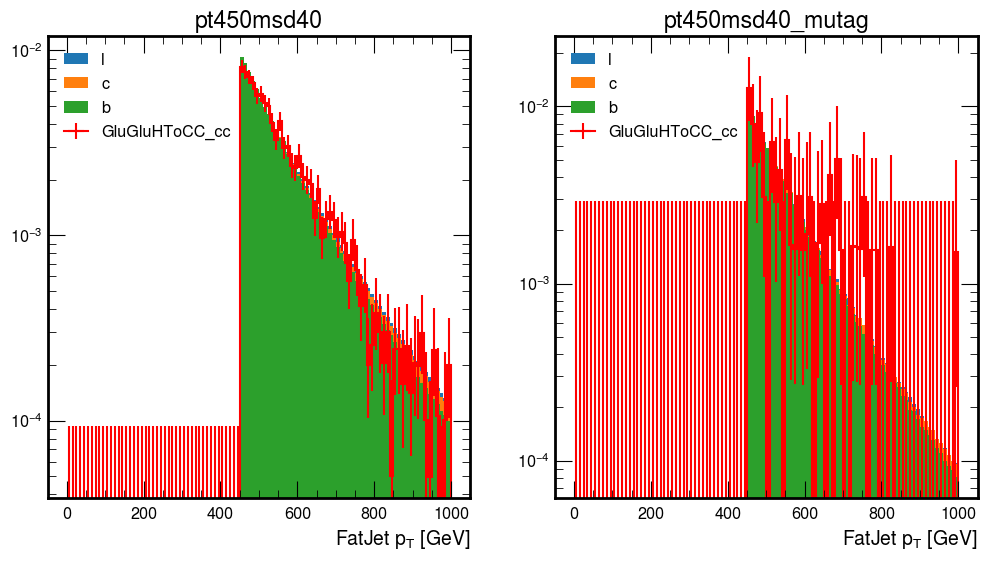

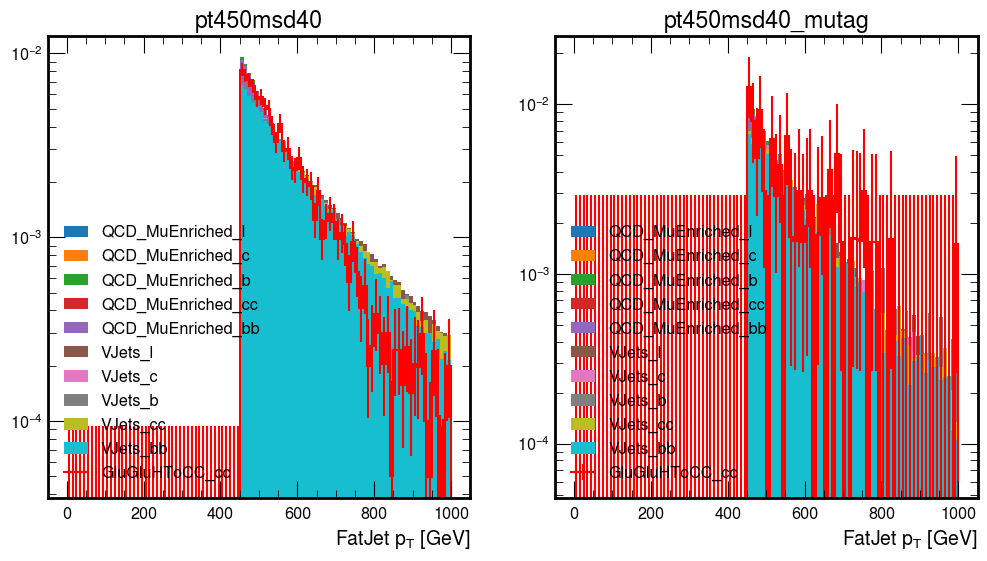

In [23]:
fontsize = 14
plt.style.use([hep.style.ROOT, {'font.size': fontsize}])

sample_signal = 'GluGluHToCC_cc'
for histname in ['FatJetGood_particleNetMD_Xcc_QCD', 'FatJetGood_msoftdrop', 'FatJetGood_pt']:
    for group in [True, False]:
        h = o['variables'][histname]
        h_dict_proxy = {}
        h_dict_ggh = {}
        fig, axes = plt.subplots(1, 2, figsize=[12,6])
        for i, cat in enumerate(["pt450msd40","pt450msd40_mutag"]):
            for sample in h:
                if sample.startswith('QCD') | sample.startswith('VJets'):
                    h_dict_proxy[sample] = h[sample][{'cat' : cat, 'variation' : 'nominal', 'year' : '2018'}]
                elif sample == sample_signal:
                    h_dict_ggh[sample] = h[sample][{'cat' : cat, 'variation' : 'nominal', 'year' : '2018'}]
            hep.cms.text("Preliminary", fontsize=fontsize, loc=0, ax=ax)
            if group:
                stack_proxy = hist.Stack.from_dict(group_flavor(h_dict_proxy))
            else:
                stack_proxy = hist.Stack.from_dict(h_dict_proxy)
            stack_ggh = hist.Stack.from_dict(h_dict_ggh)
            stack_proxy.plot(histtype='fill', density=True, ax=axes[i]);
            stack_ggh.plot(color='red', density=True, ax=axes[i]);
            axes[i].legend();
            axes[i].set_yscale('log')
            axes[i].set_title(cat)

In [10]:
h.keys()

dict_keys(['QCD_MuEnriched_l', 'QCD_MuEnriched_c', 'QCD_MuEnriched_b', 'QCD_MuEnriched_cc', 'QCD_MuEnriched_bb', 'VJets_l', 'VJets_c', 'VJets_b', 'VJets_cc', 'VJets_bb', 'GluGluHToCC_l', 'GluGluHToCC_c', 'GluGluHToCC_b', 'GluGluHToCC_cc', 'GluGluHToCC_bb', 'GluGluHToBB_l', 'GluGluHToBB_c', 'GluGluHToBB_b', 'GluGluHToBB_cc', 'GluGluHToBB_bb'])